In [26]:
'''
函数说明：梯度下降算法测试函数
求公式：y(x) = 2*x^2 + 3*x + 4的最小值点
'''
def Gradient_Descent_Algorithm():
    def f_prime(x_old):#求f(x)的导数
        return 4*x_old+3
    
    x_old = 0 #给出梯度下降的初始值
    y_old = 4 #梯度下降的初始值
    alpha = 0.01 #学习率
    threshold = 0.0000001 #阀值
    x_new = x_old - alpha*f_prime(x_old)
    y_new = 2*x_new**2 + 3*x_new + 4
    while(abs(y_new-y_old )> threshold):
        x_old = x_new
        x_new = x_old - alpha*f_prime(x_old)
        y_old = y_new
        y_new = 2*x_new**2 + 3*x_new + 4
    print(x_old,y_old)

if __name__== '__main__':
    Gradient_Descent_Algorithm()
    

-0.7492118145489745 2.87500124247261


In [2]:
import numpy as np
import matplotlib.pyplot as plt

'''
函数说明:加载数据
'''
def loadDataSet():
    dataMat = [] #创建数据列表
    labelMat = [] #创建标签列表
    fr = open('testSet.txt') #打开数据文件
    for line in fr.readlines():
        lineArr = line.strip().split() #去除回车，放入lineArr
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    fr.close()
    return dataMat, labelMat
        

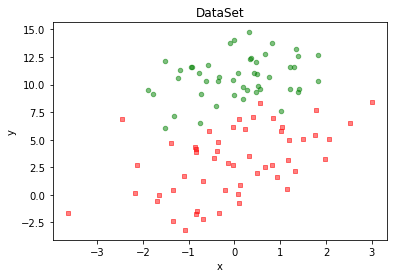

In [44]:
'''
函数说明：绘制数据集
'''
def plotDataSet():
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataMat)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if labelMat[i] == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s = 20,c = 'red',marker = 's',alpha = .5)
    ax.scatter(xcord2,ycord2,s = 20,c = 'green',alpha = .5)
    plt.title('DataSet')
    plt.xlabel('x'); plt.ylabel('y')
    plt.show()

if __name__ == '__main__':
    plotDataSet()
    


In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
X_train_std,y_train = loadDataSet()
lr.fit(X_train_std, y_train)
print(lr.fit)

<bound method LogisticRegression.fit of LogisticRegression(C=1000.0, random_state=0)>


In [11]:
lr.predict_proba([[1,1,1],[2,2,2]])

array([[8.34490662e-07, 9.99999166e-01],
       [1.76471750e-06, 9.99998235e-01]])

C:\Users\liangyi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liangyi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liangyi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liangyi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21106 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liangyi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liangyi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26368 mi

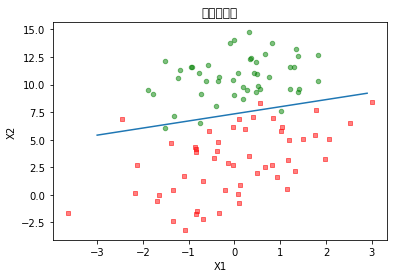

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 26 21:59:07 2021

@author: liangyi
"""
import numpy as np
import math
import matplotlib.pyplot as plt

'''
函数说明:引入数据
'''
def loadDataSet():
    dataMat = [] #创建数据列表
    labelMat = [] #创建标签列表
    fr = open('testSet.txt') #打开数据文件
    for line in fr.readlines():
        lineArr = line.strip().split() #去除回车，放入lineArr
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    fr.close()
    return dataMat, labelMat



'''
函数说明：LogisticRegression函数
'''
def h_f(THETA,X):
    return 1/(1+math.exp(-(THETA[0]+THETA[1]*X[1]+THETA[2]*X[2])))

'''
函数说明：cost函数
'''
def cost_f(THETA,X,y):
    return -y*math.log(h_f(THETA,X),math.e)-(1-y)*math.log(1-h_f(THETA,X),math.e)

'''
函数说明：代价函数
'''
def J_f(THETA,dataMat,labelMat,m):
    sm = 0
    for i in range(m):
        sm += cost_f(THETA,dataMat[i],labelMat[i])
    sm = sm/m
    return sm

def theta_f(theta_j,THETA,dataMat,labelMat,m,alpha,j):#theta_j代表第j个参(从0开始)
    sm = 0
    for i in range(m):
        sm += dataMat[i][j] * (h_f(THETA,dataMat[i])-labelMat[i])
    sm = alpha * sm
    return theta_j - sm

'''
函数说明：逻辑回归的梯度下降函数
'''
def Gradient_Descent():
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    m = np.shape(dataMat)[0] #样本数量
    
    theta0 = 0 #为参数设置初值
    theta1 = 0
    theta2 = 1
    cost_old = J_f([theta0,theta1,theta2],dataMat,labelMat,m)
    #print(theta0,theta1,theta2,cost_old)
    threshold = 0.000001 #设置阀值
    alpha = 0.01 #设置步长（学习率）
    
    temp0 = theta_f(theta0,[theta0,theta1,theta2],dataMat,labelMat,m,alpha,0)
    temp1 = theta_f(theta1,[theta0,theta1,theta2],dataMat,labelMat,m,alpha,1)
    temp2 = theta_f(theta2,[theta0,theta1,theta2],dataMat,labelMat,m,alpha,2)
    cost_new = J_f([temp0,temp1,temp2],dataMat,labelMat,m)
    #print(temp0,temp1,temp2,cost_new)
    while abs(cost_old-cost_new)>threshold :
        theta0 = temp0
        theta1 = temp1
        theta2 = temp2
        cost_old = cost_new
        
        temp0 = theta_f(theta0,[theta0,theta1,theta2],dataMat,labelMat,m,alpha,0)
        temp1 = theta_f(theta1,[theta0,theta1,theta2],dataMat,labelMat,m,alpha,1)
        temp2 = theta_f(theta2,[theta0,theta1,theta2],dataMat,labelMat,m,alpha,2)
        cost_new = J_f([temp0,temp2,temp2],dataMat,labelMat,m)
    return [theta0,theta1,theta2]
    


'''
函数说明：根据解出的系数描绘数据集以及分割线
'''
def plotBestFit():
    THETA = Gradient_Descent() #解出一组系数
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    m = np.shape(dataMat)[0]
    xcord1 = []; ycord1 = []
    xcord0 = []; ycord0 = []
    
    for i in range(m):
        if labelMat[i] == 1:
            xcord1.append(dataArr[i,1]);ycord1.append(dataArr[i,2])
        else:
            xcord0.append(dataArr[i,1]);ycord0.append(dataArr[i,2])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s = 20,c = 'red',marker = 's',alpha = .5)
    ax.scatter(xcord0,ycord0,s = 20,c = 'green',alpha = .5)
    
    X = np.arange(-3.0,3.0,0.1)
    Y = (-THETA[0]-THETA[1]*X)/THETA[2]
    ax.plot(X,Y)
    plt.title('最优分割线')
    plt.xlabel('X1');plt.ylabel('X2')
    plt.show()

if __name__ == '__main__':
    plotBestFit()